In [1]:
import csv, datetime, pandas as pd

# Read data for January 5

In [2]:
file = 'C:\\Users\\vaibhav\\Documents\\UVA\\Summer\\Project\\Code\\Vaibhav\\HoneypotCSV\\2018-01-05-mhn.csv'

parse_dates = ['timestamp']
data = pd.read_csv(file, parse_dates = parse_dates, date_parser = lambda x: datetime.datetime.fromtimestamp(float(x)))
pd.to_datetime(data['timestamp'])
print(data.shape)

(3397, 12)


Finding out unique sources

In [7]:
unique_src = data.src.unique()
print(len(unique_src))

1077


Unique ip sources frequency table

In [8]:
df = data.groupby('src').size().reset_index(name='Count').rename(columns={'src':'Unique src'}).sort_values('Count', ascending = False)
print(df.head())

           Unique src  Count
1059     93.115.26.45    426
485     185.107.94.10    391
1007   80.211.132.218    100
735    219.137.226.75     86
772   221.229.204.101     84


In [9]:
df = data.groupby('app').size().reset_index(name='Count').rename(columns={'app':'Unique app'}).sort_values('Count', ascending = False)
print(df)

  Unique app  Count
1    dionaea   2997
0       amun    400


Grouping by timestamp

In [10]:
df = data.groupby('timestamp').size().reset_index(name='Count')
print(df.head())

            timestamp  Count
0 2018-01-04 06:51:16      3
1 2018-01-04 06:51:36      1
2 2018-01-04 06:51:56      1
3 2018-01-04 06:52:16      1
4 2018-01-04 06:53:16      1


In [3]:
time_series = data.groupby(data.timestamp.dt.hour).size().reset_index(name='Count').rename(columns={'timestamp':'Hour'})
print(time_series)

    Hour  Count
0      0    110
1      1    123
2      2    205
3      3    171
4      4    129
5      5    152
6      6     95
7      7    126
8      8    118
9      9    129
10    10    101
11    11    141
12    12     99
13    13     98
14    14    139
15    15    239
16    16    150
17    17    161
18    18    217
19    19    211
20    20    101
21    21    101
22    22    162
23    23    119


Bar chart of time stamp count

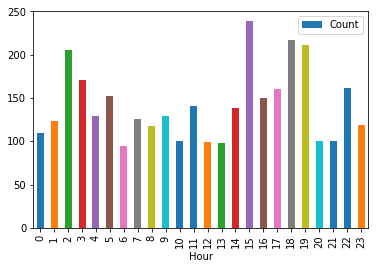

In [5]:
time_series.plot(kind='bar', x = 'Hour', y = 'Count')